In [1]:
import tensorflow as tf
import keras
import numpy as np
import cv2
from keras.models import load_model
from mtcnn import MTCNN
from keras_facenet import FaceNet
from matplotlib.pyplot import imshow

In [2]:
#embedder = FaceNet()

# Gets a detection dict for each face
# in an image. Each one has the bounding box and
# face landmarks (from mtcnn.MTCNN) along with
# the embedding from FaceNet.

#detections = embedder.extract(image, threshold=0.95)

# If you have pre-cropped images, you can skip the
# detection step.

#embeddings = embedder.embeddings(images)

In [3]:
def img_enc(img_path,embedder,detector):
    img=crop_face(img_path,detector)
    img=cv2.resize(img, (160,160))
    img=np.reshape(img,(1,160,160,3))
    enc=embedder.embeddings(img)
    return enc

In [4]:
#detector = MTCNN()
def crop_face(img_path,detector):
    img = cv2.imread(img_path)
    res=detector.detect_faces(img)
    x=res[0]["box"][0]
    y=res[0]["box"][1]
    w=res[0]["box"][2]
    h=res[0]["box"][3]
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = img[y:y + h, x:x + w]
    return roi_color

In [5]:
def verify(inp_img,name,embedder,detector):
    enc=img_enc(inp_img,embedder,detector)
    dist=np.linalg.norm(db[name]-enc)
    print(dist)
    if dist>0.7:
        print("It's him.")
    else:
        print("It's not him.")
    imshow(cv2.imread(inp_img))

In [6]:
def recognition(inp_img,embedder,detector):
    enc=img_enc(inp_img,embedder,detector)
    m=100
    encs=[]
    for(name,db_enc) in db.items():
        dist=np.linalg.norm(db_enc-enc)
        encs.append(dist)
        if dist<m:
            m=dist
            identity=name
    print("it's "+identity+".")
    imshow(cv2.imread(inp_img))

In [7]:
def add_to_db():
    embedder=FaceNet()
    detector=MTCNN()
    n=int(input("Enter numbers of person data you want to add : "))
    for i in range(n):
        name=input("Enter the name : ")
        img_path=input("Enter image path : ")
        enc=img_enc(img_path,embedder)
        db[name]=enc

In [8]:
def main():
    embedder=FaceNet()
    detector=MTCNN()
    n=int(input("Enter 0 for face verification or enter 1 for face recognition : "))
    if n==0:
        img_path=input("Enter image path : ")
        name=input("Enter name of the person : ")
        verify(img_path,name,embedder,detector)
    else:
        img_path=input("Enter image path : ")
        recognition(img_path,embedder,detector)

In [9]:
db={}

In [10]:
#for db
embedder=FaceNet()
detector=MTCNN()

In [11]:
#creating database manually for now
db["Amitabh Bachan"]=img_enc("images/amitabh1.jfif",embedder,detector)
db["Pankaj Tripathi"]=img_enc("images/pnkj1.jfif",embedder,detector)
db["Shahrukh Khan"]=img_enc("images/srk1.jpg",embedder,detector)
db["Akshay Kumar"]=img_enc("images/aki1.jfif",embedder,detector)
db["Nawazudin Sidique"]=img_enc("images/nawaj1.jfif",embedder,detector)
db["Raj Kumar Rao"]=img_enc("images/rkr1.jfif",embedder,detector)

Enter 0 for face verification or enter 1 for face recognition : 1
Enter image path : images/pnkj2.jfif
it's Pankaj Tripathi.


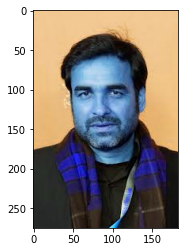

In [12]:
#Recognition test
main()

Enter 0 for face verification or enter 1 for face recognition : 0
Enter image path : images/nawaj2.jfif
Enter name of the person : Nawazudin Sidique
0.65043354
It's not him.


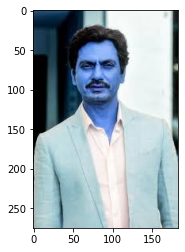

In [13]:
#Verification test
main()